<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


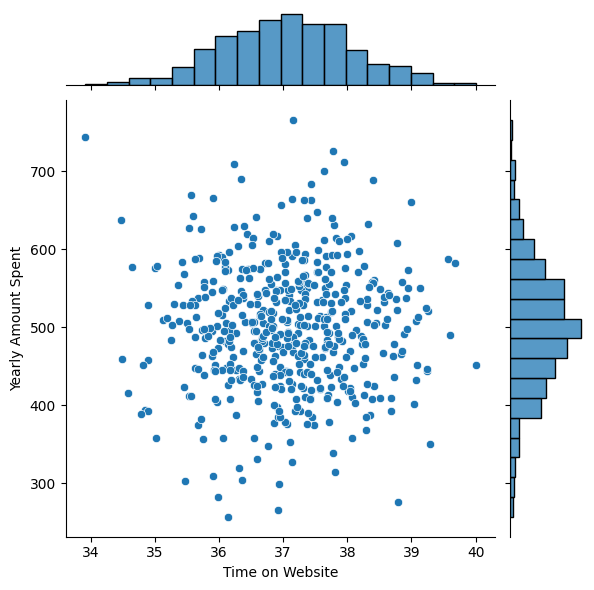

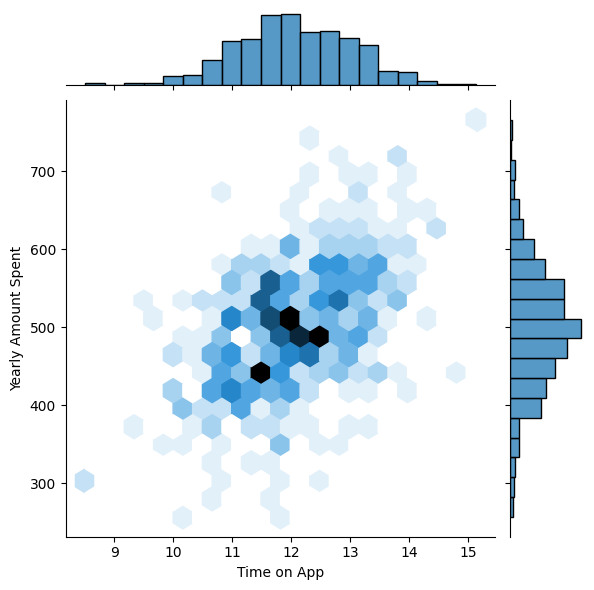

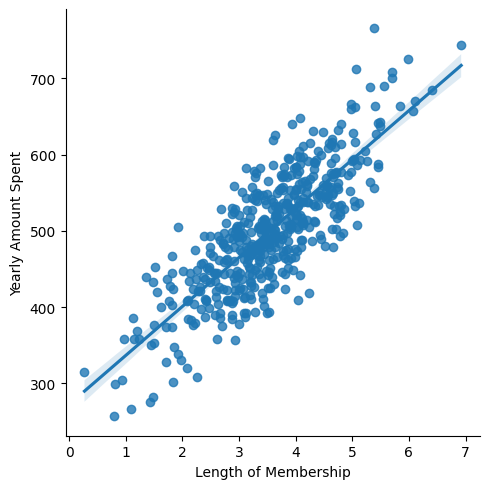

In [ ]:
#Step 1: Import Necessary Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Step 2: Study the Data
#Step 3: Read and Load the Dataset
customer_data = pd.read_csv("Ecommerce-Customers.csv")
customer_data.head()
customer_data.describe()
customer_data.info()

#Step 4: Exploratory Data Analysis(EDA)
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=customer_data)
sns.jointplot(x="Time on App", y="Yearly Amount Spent", kind="hex", data=customer_data)
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=customer_data)
##sns.pairplot(customer_data)


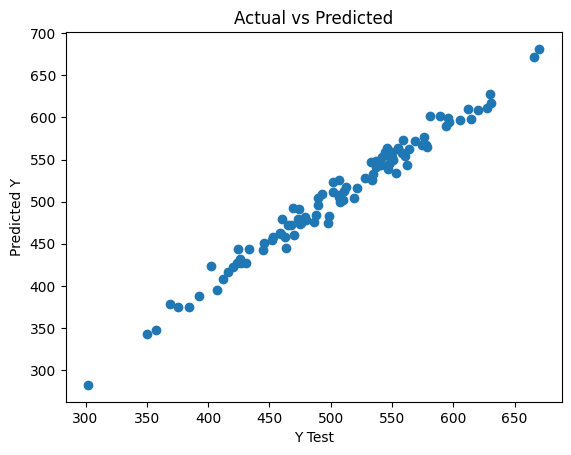

MAE :   8.344472983315137
MSE :   110.50616311720778
RMAE :   10.512191166317695


,Coefficient
Avg. Session Length,25.784781
Time on App,39.098929
Time on Website,0.714824
Length of Membership,61.609596


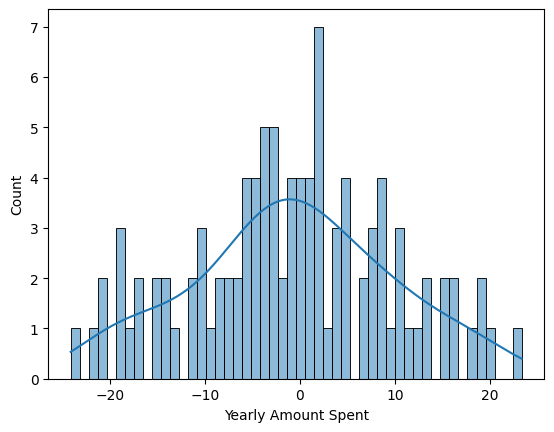

In [ ]:
#Step 1: Import Necessary Dependencies
import pandas as pd
%matplotlib inline
import seaborn as sns

#Step 2: Study the Data
#Step 3: Read and Load the Dataset
customer_data = pd.read_csv("Ecommerce-Customers.csv")

#Step 5: Splitting of Data into Training and Testing Data
X = customer_data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customer_data['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=105)

#Step 6: Training the Model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
lr_model.coef_

#Step 7: Predictions on Test Data
predictions = lr_model.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted')
plt.show()

#Step 8: Evaluating the Model
print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

#Step 9: Explore the Residuals
sns.histplot(y_test - predictions,bins=50,  kde=True)

#Step 10: Model Evaluation
coefficient = pd.DataFrame(lr_model.coef_,X.columns)
coefficient.columns = ['Coefficient']
coefficient
